# CDS 230 - Modeling and Simulation 1 - Fall 2019
# Non-uniform distributions and example problems

**Lecturer:** Dr. Hamdi Kavak

**Email:** hkavak@gmu.edu

**Lecture:** 11/06/2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Pick a number exercise

In [2]:
# numbers picked in the classroom
picked_numbers = [9, 8, 4, 7, 9, 8, 7, 6, 8, 8, 7, 4, 7, 4, 2, 7, 4, 1, 2, 3, 9]

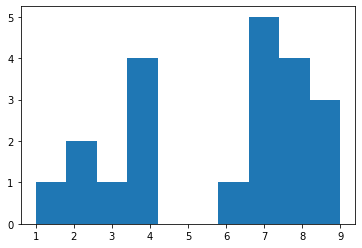

In [3]:
plt.hist(picked_numbers)
plt.show()

In [4]:
# numbers picked in by random number generator
randomly_picked = np.random.randint(1,11, size=len(picked_numbers))

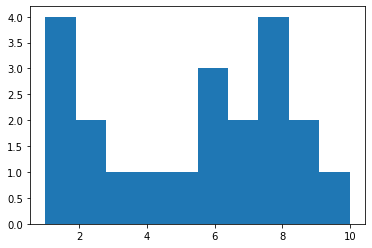

In [5]:
plt.hist(randomly_picked)
plt.show()

In [6]:
len(randomly_picked)

21

In [7]:
# what if random number generator picks more
randomly_picked = np.random.randint(1,11, size=100)

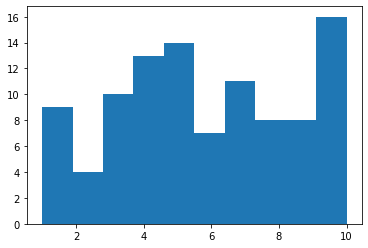

In [8]:
plt.hist(randomly_picked)
plt.show()

## 2. Normal distribution

In [9]:
# generate 10 thousand numbers sampled from a normal distribution with mean=0, std deviation=0.5
norm1 = np.random.normal(0, 0.5, size=10000)

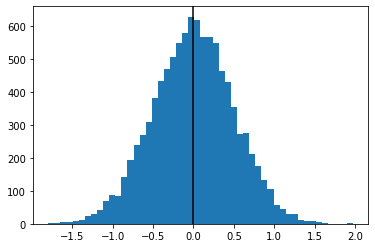

In [10]:
plt.hist(norm1, bins=50)
plt.axvline(x=0, color='k')
plt.show()
# as you can see in the histogram below, values are mostly dispersed 3 times greater than the standard deviation

In [11]:
# generate 10 thousand numbers sampled from a normal distribution with mean=5, std deviation=10
norm2 = np.random.normal(5, 10, size=10000)

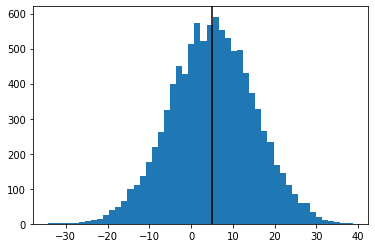

In [12]:
plt.hist(norm2, bins=50)
plt.axvline(x=5, color='k')
plt.show()

## 3. Poisson distribution

In [13]:
# generate 16 numbers sampled from a poisson distribution with lamda (intensity)=100
poiss1 = np.random.poisson(100, size=16)

In [14]:
poiss1

array([112,  88, 106, 106,  97,  77,  97,  90, 107,  94, 102,  97,  98,
       100,  90,  95])

In [15]:
# the mean is close to the intensity value we gave in the beginning
poiss1.mean()

97.25

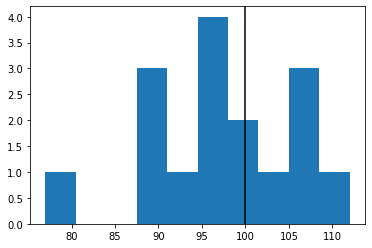

In [16]:
plt.hist(poiss1)
plt.axvline(x=100, color='k')
plt.show()

In [17]:
# if we created more values with the same parameters, we would see a smoother distribution
poiss2 = np.random.poisson(100, size=1000)

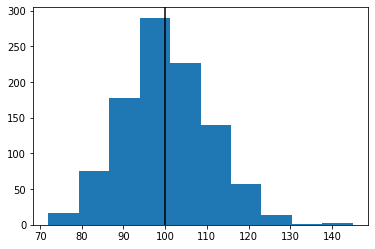

In [18]:
plt.hist(poiss2)
plt.axvline(x=100, color='k')
plt.show()

## 4. Random walk example

### First four step separately solved

In [19]:
# step 1
width = 600
height = 600

In [20]:
# step 2
step_size = 0.5

In [21]:
#step 3 - option 1
pos = (np.random.uniform(0, width) ,np.random.uniform(0, height))

In [22]:
#step 3 - option 2
pos = (np.random.random()*width, np.random.random()*height)

In [23]:
# initial position
pos

(192.61183700228173, 520.5281088196633)

In [24]:
# step 4
# 1: right, 2: down, 3: left, 4: up
direction = np.random.choice([1,2,3,4])
print(direction)

1


In [40]:
if direction == 1: # move right
    pos = (pos[0]+step_size, pos[1])
elif direction == 2: # move down
    pos = (pos[0], pos[1]-step_size)
elif direction == 3: # move left
    pos = (pos[0]-step_size, pos[1])
else: # move up
    pos = (pos[0], pos[1]+step_size)

In [26]:
pos

(193.11183700228173, 520.5281088196633)

In [27]:
# step 4- sub-bullet

# x boundary crossing
if pos[0] < 0: # x lower than 0
    pos = (pos[0] + step_size * 2, pos[1])
elif pos[0] > width: # x greater than width
    pos = (pos[0] - step_size * 2, pos[1])
elif pos[1] < 0: 
    pos = (pos[0], pos[1] + step_size * 2)
elif pos[1] > height:
    pos = (pos[0], pos[1] - step_size * 2)

### Fifth step combines all

In [34]:
# step 1
width = 600
height = 600

# step 2
step_size = 0.5

# step 3
pos = (np.random.uniform(0, width) ,np.random.uniform(0, height))

# step 5 containing step 4
X = 10000
positions_x=[]
positions_y=[]

for i in range(X):
    # pick direction
    direction = np.random.choice([1,2,3,4])
    
    # move in that direction
    if direction == 1: # move to the right
        pos = (pos[0]+step_size, pos[1])
    elif direction == 2: # move down
        pos = (pos[0], pos[1]-step_size)
    elif direction == 3: # move to left
        pos = (pos[0]-step_size, pos[1])
    else: # move to up
        pos = (pos[0], pos[1]+step_size)
    
    # correct boundary crossings
    if pos[0] < 0: # x lower than 0
        pos = (pos[0] + step_size * 2, pos[1])
    elif pos[0] > width: # x greater than width
        pos = (pos[0] - step_size * 2, pos[1])
    elif pos[1] < 0: 
        pos = (pos[0], pos[1] + step_size * 2)
    elif pos[1] > height:
        pos = (pos[0], pos[1] - step_size * 2)
    
    positions_x.append(pos[0])
    positions_y.append(pos[1])

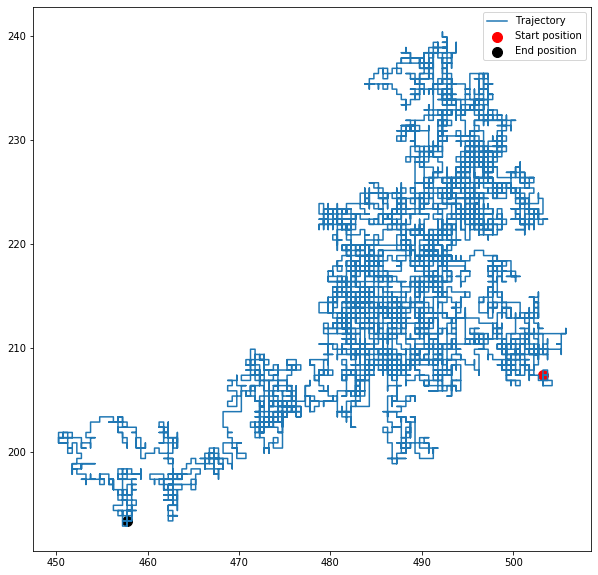

In [39]:
plt.figure(figsize=(10,10))
plt.plot(positions_x, positions_y, label="Trajectory")
plt.scatter(positions_x[0], positions_y[0], color="red",s=100, label="Start position")
plt.scatter(positions_x[-1], positions_y[-1], color="k",s=100, label="End position")
plt.legend()
plt.show()